<a href="https://colab.research.google.com/github/tluistorres/Cursos/blob/main/curso_modelo_atraso_voo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color=green>Aula 01 - Explorando os dados</font>**

In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick

print(f'Versão do pandas: {pd.__version__}')
print(f'Versão do numpy: {np.__version__}')
print(f'Versão do scikit-learn (sklearn): {sklearn.__version__}')
print(f'Versão do seaborn: {sns.__version__}')
print(f'Versão do yellowbrick: {yellowbrick.__version__}')

Versão do pandas: 2.2.2
Versão do numpy: 2.0.2
Versão do scikit-learn (sklearn): 1.6.1
Versão do seaborn: 0.13.2
Versão do yellowbrick: 1.5


### Entendendo o conjunto de dados

Neste curso, vamos aprender como construir um modelo de regressão para prever os atrasos em voos. Para isso, vamos utilizar as bibliotecas Pandas, NumPy, scikit-learn, Seaborn e Yellowbrick nas seguintes versões:

| *Biblioteca* | *Versão* |
| -------------- | ----------- |
| pandas | 1.5.3 |
| numpy | 1.23.5 |
| scikit-learn (sklearn) | 1.2.2 |
| seaborn | 0.12.2 |
| yellowbrick | 1.5 |



Neste [arquivo CSV](https://), você encontra o material com os dados que vamos trabalhar durante o curso.

## Ambiente de análise

Vamos usar uma ferramenta do Google chamada Colaboratory que é um Jupyter notebook e não requer configuração para ser utilizado. Para usar o Google Colaboratory é necessário ter uma conta Gmail, pois todo notebook ficará armazenado no Google Drive.

Para mais informações sobre esse ambiente, você pode assistir ao vídeo “Trabalhando com arquivos no Google Colab”:

Podemos solucionar, ou mesmo otimizar, essa etapa de atraso de voos conhecendo-os. Sendo assim, podemos construir um modelo de machine learning que seja capaz de prever esse atraso no voo, e a saída desse modelo de machine learning poderá ser utilizada como entrada para outros processos de otimização para melhorar ainda mais a operação desse aeroporto.

Como vamos inserir esses dados em um modelo de machine learning e ele precisa de dados, é ideal conhecermos esses dados. Então, nesta aula, vamos justamente conhecer os dados com os quais trabalhamos!

## Entendendo o conjunto de dados

## Importação dos dados


Começaremos no Google Colab. A primeira coisa que vamos fazer será renomear o notebook como modelo-atraso-voo.ipynb para identificá-lo melhor. Em seguida, vamos importar os dados.

Clicaremos no quarto ícone na aba mais à esquerda e depois em "Fazer upload para o armazenamento da sessão", correspondente ao primeiro ícone na aba "Arquivos". Vamos procurar o conjunto de dados flights, conjunto de dados de voo.

Após clicar em "Abrir", surgirá um aviso de que ele vai ser salvo em outro lugar. Podemos clicar em "OK". Feito isso, aguardamos os dados serem carregados para o ambiente do Google Colab.

## Leitura dos dados

Uma vez carregado o conjunto de dados, precisamos ler esses dados. Para isso, é necessária uma biblioteca muito interessante e muito utilizada em Data Science: a Pandas. Como fazemos essa leitura?

Primeiro, devemos importar a biblioteca com o seguinte comando:

In [9]:
import pandas as pd

Após importar a biblioteca, vamos executar a célula com "Shift + Enter" para criar outra célula abaixo. Agora temos que ler os dados. Esses dados estão em um formato chamado CSV. Como ler um CSV no Pandas?

Para isso, utilizamos o comando pd.read_csv(), para o qual passamos o caminho do arquivo. O arquivo está solto na pasta, então vamos simplesmente copiar o nome do arquivo e colar entre aspas simples e entre parênteses.

## Atribuição a uma variável

Agora vamos atribuir o que escrevemos na célula anterior a uma variável específica chamada dados. Para conferir que deu certo, vamos visualizar as 5 primeiras linhas usando o comando head().

In [10]:
dados = pd.read_csv('flights.csv')
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


Vamos executar novamente com "Shift + Enter". Teremos o mesmo conjunto de dados apresentado acima, e já percebemos que conseguimos tirar algumas informações. Temos uma coluna chamada flight_id (identificador do voo); a airline (companhia aérea); o tipo da aeronave, que é aircraft_type; schengen, que indica se o voo é do espaço Schengen ou não.

    O termo "Schengen" está relacionado com o Acordo de Schengen, um acordo europeu que tem implicações em termos de logística aeroportuária, mas não está diretamente relacionado com as operações aeroportuárias em si.

O aeroporto de origem (origin) está em siglas. Por exemplo: o aeroporto de Congonhas recebe a sigla CGH. Temos o arrival_time (hora de chegada), departure_time (hora de saída), o dia (day), e o ano que é correspondente a esse dia (year). Por exemplo: temos o dia 0 em 2010, então é 1º de janeiro de 2010.

Por fim, temos a coluna is_holiday, se é um feriado ou não, e a coluna delay, o atraso em minutos.

Importante notar que a hora em arrival_time está em formato decimal. Por exemplo: como seria 8.88 em horas? Poderíamos fazer um cálculo simples. Seria 0.88 multiplicado por 60 para saber a quantidade em minutos. Teríamos, basicamente, 8 horas e 52 minutos.

O mesmo processo se repete para departure_time. Multiplicamos os números após a vírgula por 60 para saber a quantidade de minutos. Teremos, assim, o tempo tanto em horas quanto em minutos.

## Visualizando as últimas linhas

Já conseguimos visualizar as linhas e sabemos o que é cada uma das colunas. O que podemos fazer agora é visualizar as últimas linhas. Verificar, por exemplo, quantas amostras temos no nosso conjunto de dados. Para isso, podemos usar o comando dados.tail(). Assim, visualizamos as últimas 5 amostras.

dados.tail()

In [11]:
dados.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648


Percebemos que vai até a linha 71.174. Como começa em 0, consequentemente, temos 71.175 amostras no nosso conjunto de dados. Outra coisa que podemos fazer é visualizar a quantidade de colunas.

## Visualizando a quantidade de colunas

Para evitar contar manualmente, utilizamos o método shape, então digitamos dados.shape em uma nova célula.

In [12]:
dados.shape

(71175, 11)

Como retorno, temos exatamente o que acabamos de executar: 71.175 linhas e 11 colunas ao todo. Já conseguimos ter essas duas informações, mas não conseguimos ter informações e estatísticas mais descritivas. Por exemplo: qual o valor médio das colunas numéricas? Qual o valor máximo? Qual a mediana? Não temos essas informações só com o que executamos.

Para obter essas informações, vamos executar o método describe(), ou seja, dados.describe() em uma nova célula.

In [13]:
dados.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


Percebemos que não há 11 colunas, justamente porque estão retiradas as colunas categóricas. Temos flight_id, arrival_time, departure_time, day, year e delay. Não faz tanto sentido analisar a coluna flight_id, pois é um identificador. Então, vamos partir para o arrival_time.

Em arrival_time, temos: a média (mean); o desvio padrão (std); o valor mínimo (min); o primeiro quartil (25%); a mediana (50%), que é o valor que está no meio do conjunto de dados, nesse caso, 14.25; o terceiro quartil (75%), que é 16.9; e o valor máximo (max) que temos de arrival_time, ou seja, o maior valor que um avião chegou nesse aeroporto foi às 19 horas e 34 minutos. Multiplicamos por 60 para saber a quantidade exata de minutos.

Em compensação, o valor máximo do departure_time, isto é, a hora de saída, é 23.34. Multiplicamos novamente por 60 para saber a quantidade exata de minutos. Temos o valor médio 16 para o departure_time e o valor médio 13 para o arrival_time, por exemplo, e temos essas mesmas estatísticas para as outras colunas.

## Analisando a coluna delay

Como nossa variável alvo, isto é, o problema de negócio com os dados que tentamos resolver é relacionado ao atraso, precisamos analisar a coluna delay. A média do atraso é 12 minutos, o desvio padrão é 23, o valor mínimo é -41, ou seja, houve voos que adiantaram, e o valor máximo é de 125 minutos, ou seja, houve aviões que atrasaram até 2 horas e 5 minutos, o que é bastante tempo. Como fazer para visualizar estatísticas descritivas para variáveis categóricas?

Podemos executar o mesmo método. Vamos copiar dados.describe(), colar em uma nova célula abaixo, e adicionar o parâmetro include que será igual a 'O'.

In [14]:
dados.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


Primeiramente, temos a coluna airline, que é a companhia aérea. São três companhias aéreas diferentes, e a que mais aparece (top) é a BZ, com a frequência (freq) de 47598. Podemos replicar essas análises para as outras três colunas. Assim, conseguimos ter uma análise mais descritiva de nossas colunas categóricas.

## Extraindo mais informações

Já conseguimos extrair bastante informação com os métodos que executamos, mas há outro método que fornece informações bastante relevantes: o método info(). Vamos executar em uma nova célula dados.info().

In [15]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


Temos o RangeIndex, que indica a quantidade de linhas do conjunto de dados, que varia de 0 a 71.174; bem como o número de colunas, totalizando 11. Nesse caso, temos duas informações muito relevantes: as colunas Non-Null Count, que é a quantidade de valores não nulos, e Dtype, que é o tipo da coluna.

Percebemos que todas as colunas têm 71.175 valores não nulos. Isso indica que não há dados nulos no nosso conjunto de dados, o que significa que não precisamos nos preocupar com esse tipo de tratamento.

Outra coisa que percebemos é o tipo dos dados. Todos os tipos estão correspondentes com as informações, então também não precisamos nos preocupar com a conversão do tipo da coluna para a tipagem correta, pois já estão na tipagem correta.

## Conclusão

Conseguimos tirar essas duas informações que são muito relevantes. Porém, construímos uma análise estatística basicamente com números. Para visualizar as informações de forma mais abrangente, o ideal construir gráficos!

## Finalidade do método Describe

A Estatística Descritiva é um ramo da Estatística que utiliza várias técnicas para descrever e resumir um conjunto de dados. Ela é extremamente útil na análise inicial de dados, fornecendo um resumo rápido e eficiente para os(as) pesquisadores(as). Um dos métodos mais usados na estatística descritiva é o describe().

Nesse sentido: qual é a finalidade principal do método describe no Pandas e quais estatísticas são geradas por ele?

Calcula estatísticas resumidas dos dados em um DataFrame, incluindo: contagem, média, desvio padrão, mínimo, quartis e máximo.


O método describe é uma ferramenta poderosa que fornece estatísticas descritivas de um conjunto de dados. Este método calcula várias estatísticas resumidas de uma só vez, incluindo a contagem (número de elementos), média, desvio padrão (medida de dispersão dos dados), mínimo (o menor valor), os quartis (25%, 50% e 75% - correspondentes ao primeiro quartil, mediana e terceiro quartil, respectivamente) e o máximo (o maior valor). Além disso, é possível obter as estatística descritivas para as variáveis categóricas: df.describe(include=['O'])

Construímos nossas análises estatísticas dos dados, mas para termos uma análise ainda mais abrangente, o ideal é construir análises gráficas. É isso que vamos fazer neste vídeo!

### Visualizações gráficas dos dados

Começaremos no ambiente de desenvolvimento do Google Colab, a partir do momento que deixamos no vídeo passado. Deixamos uma célula de markdown pré-pronta, com o título "Visualizações gráficas dos dados", para deixar nosso notebook mais organizado, e também preparamos uma célula de código para digitarmos.

Como vamos trabalhar com gráficos, o ideal é trazer bibliotecas que trabalhem com gráficos em Python. Vamos trabalhar com duas: Matplotlib e Seaborn. Então, vamos importá-las para o nosso ambiente. Para isso, fazemos import matplotlib.pyplot as plt, que é o apelido dessa biblioteca na comunidade, e import seaborn as sns, que também é o apelido da biblioteca. Vamos executar a célula com ""Shift + Enter"".

### Visualizações gráficas dos dados

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

Agora as bibliotecas estão no nosso ambiente de desenvolvimento. Na próxima célula, vamos colar um código pré-pronto. O ideal é que você pause o vídeo, copie o código para o seu notebook, e depois retorne para explicarmos linha a linha.

## Primeiro gráfico

Na primeira linha, onde temos average_delay, nós agrupamos pela companhia aérea, porque queremos construir um gráfico de atrasos médios por companhia aérea. Como queremos saber a média do atraso, usamos ['delay'].mean().

Para ficar mais evidente o que fizemos, vamos criar uma nova célula acima, colar a primeira linha do código e imprimi-la digitando average_delay na segunda linha da célula.

In [21]:
average_delay = dados.groupby('airline')['delay'].mean().reset_index()
average_delay

,airline,delay
0,BZ,3.077595
1,MM,40.498007
2,YE,25.772248


Qual a necessidade do reset_index()? Se não o colocássemos, seria retornada uma series, e queremos trabalhar com esse conjunto de dados como um DataFrame. Por isso, usamos o .reset_index(). Assim, temos um DataFrame e conseguimos trabalhar de forma mais fácil, referenciando as colunas airline e delay.

    Podemos excluir a nova célula criada e retornar para a anterior.

Na linha seguinte, temos o método sns.barplot(), onde no eixo x adicionamos airline, no eixo y, delay, e em data, adicionamos o DataFrame average_delay que mostramos anteriormente.

Em seguida, adicionamos o título "Companhias aéreas vs atrasos médios", nomeando o eixo x como "Companhias aéreas" e o eixo y como "Atraso médios em minutos". Na última linha do primeiro gráfico, imprimimos com plt.show().

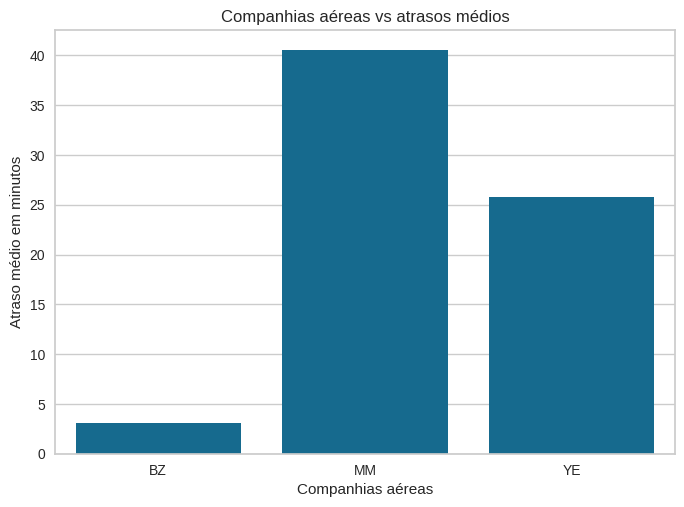

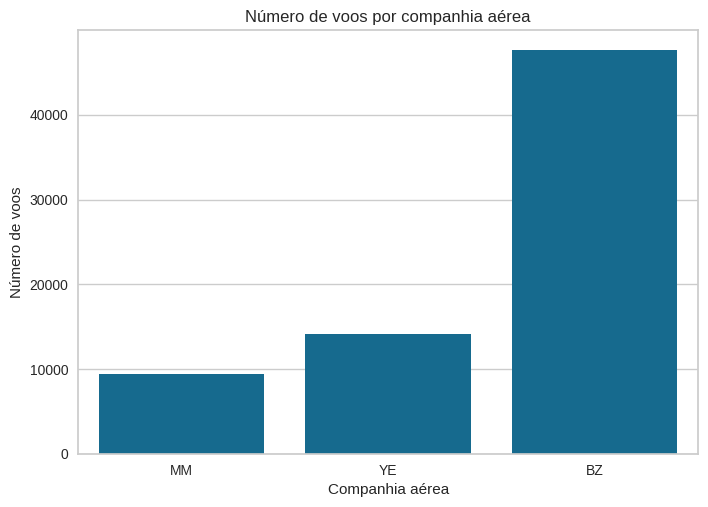

In [17]:
average_delay = dados.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=average_delay)
plt.title('Companhias aéreas vs atrasos médios')
plt.xlabel('Companhias aéreas')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(data=dados, x='airline')
plt.title('Número de voos por companhia aérea')
plt.xlabel('Companhia aérea')
plt.ylabel('Número de voos')
plt.show()

Qual a necessidade do reset_index()? Se não o colocássemos, seria retornada uma series, e queremos trabalhar com esse conjunto de dados como um DataFrame. Por isso, usamos o .reset_index(). Assim, temos um DataFrame e conseguimos trabalhar de forma mais fácil, referenciando as colunas airline e delay.

Podemos excluir a nova célula criada e retornar para a anterior.

Na linha seguinte, temos o método sns.barplot(), onde no eixo x adicionamos airline, no eixo y, delay, e em data, adicionamos o DataFrame average_delay que mostramos anteriormente.

Em seguida, adicionamos o título "Companhias aéreas vs atrasos médios", nomeando o eixo x como "Companhias aéreas" e o eixo y como "Atraso médios em minutos". Na última linha do primeiro gráfico, imprimimos com plt.show().

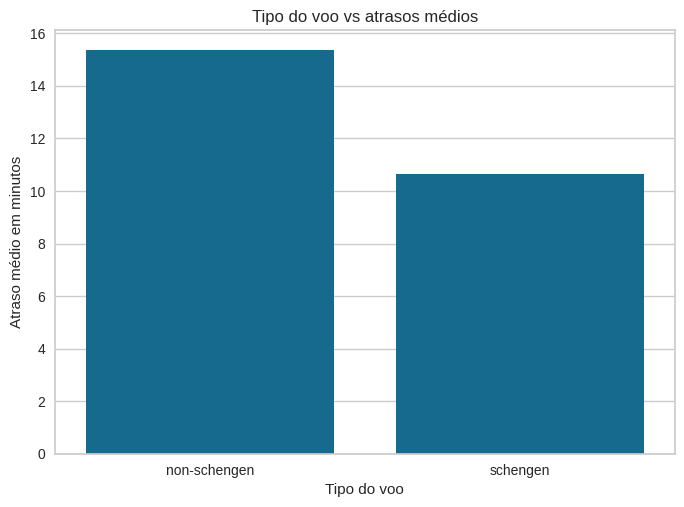

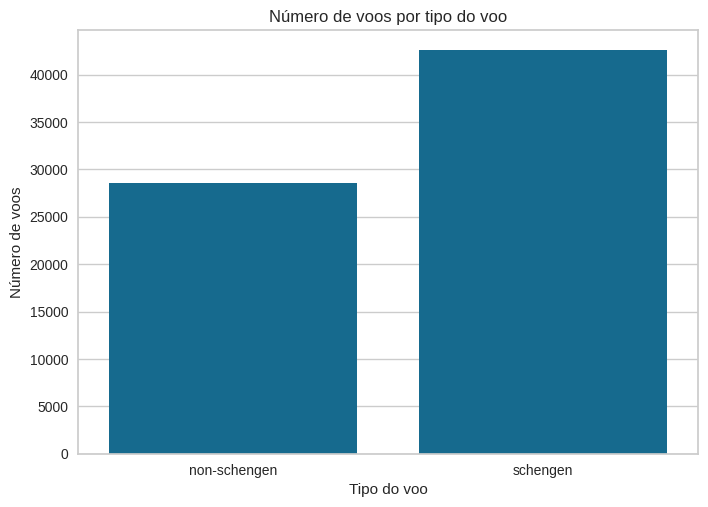

In [22]:
average_delay = dados.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=average_delay)
plt.title('Tipo do voo vs atrasos médios')
plt.xlabel('Tipo do voo')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(data=dados, x='schengen')
plt.title('Número de voos por tipo do voo')
plt.xlabel('Tipo do voo')
plt.ylabel('Número de voos')
plt.show()

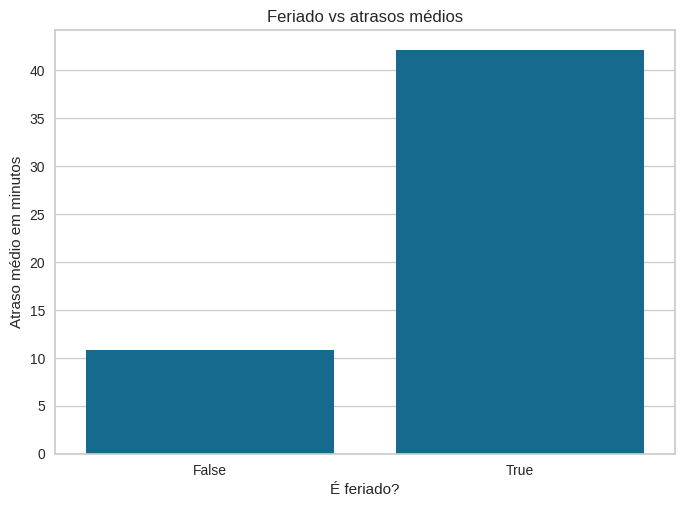

In [19]:
average_delay = dados.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=average_delay)
plt.title('Feriado vs atrasos médios')
plt.xlabel('É feriado?')
plt.ylabel('Atraso médio em minutos')
plt.show()

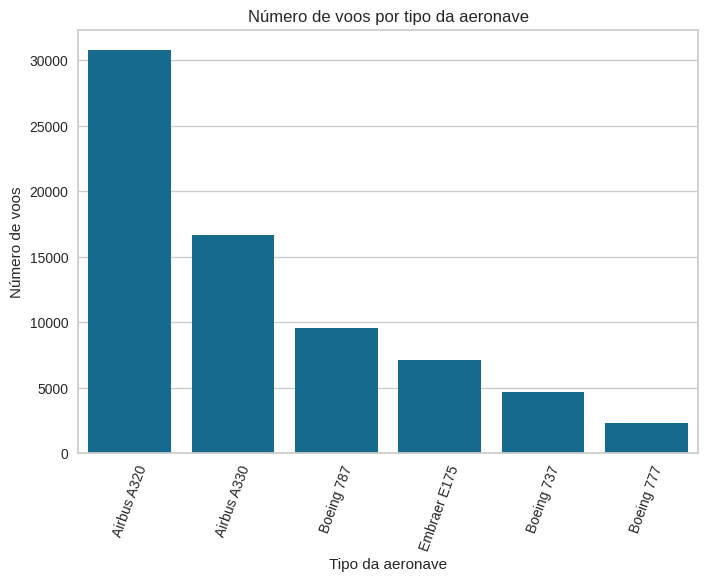

In [20]:
order = dados['aircraft_type'].value_counts().index
sns.countplot(data=dados, x='aircraft_type', order = order)
plt.title('Número de voos por tipo da aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo da aeronave')
plt.ylabel('Número de voos')
plt.show()

No primeiro gráfico, percebemos que a companhia aérea com mais atraso médio é a MM, seguida por YE e por último a BZ. Já no segundo gráfico, mesmo a BZ tendo o menor atraso, é a companhia aérea que mais tem voos, com mais de 40.000 voos, seguida por YE e por último MM. Ou seja, a MM é a que tem menos voos e atrasa mais.

## Terceiro e quarto gráficos

Agora, vamos construir um gráfico do tipo de voo, ou seja, se é Schengen ou não. Vamos copiar o código da célula anterior, mas em vez de agrupar por airline, agruparemos por schengen, e ajustaremos os títulos e eixos conforme o contexto.

Para começar, vamos selecionar airline dentro de groupby() e usar o atalho "Ctrl + Shift + L" para selecionar todas as ocorrências de airline na célula e substituir por schengen. Assim, fizemos a alteração necessária tanto em barplot() quanto em countplot().

Quanto aos títulos, no lugar de "Companhias aéreas vs atrasos médios" teremos "Tipo do voo vs atrasos médios", com "Tipo do voo" no eixo x e "Atraso médio em minutos" no eixo y. Da mesma forma, no lugar de "Número de voos por companhia aérea" teremos "Número de voos por tipo do voo", com "Tipo do voo" no eixo x e "Número de voos" no eixo y.

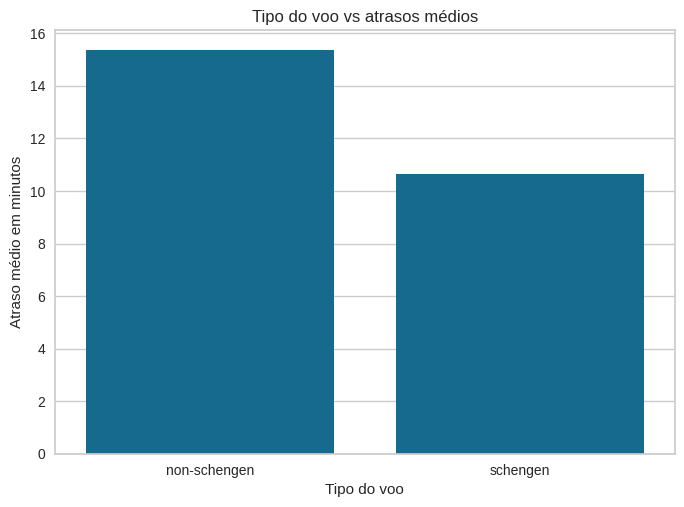

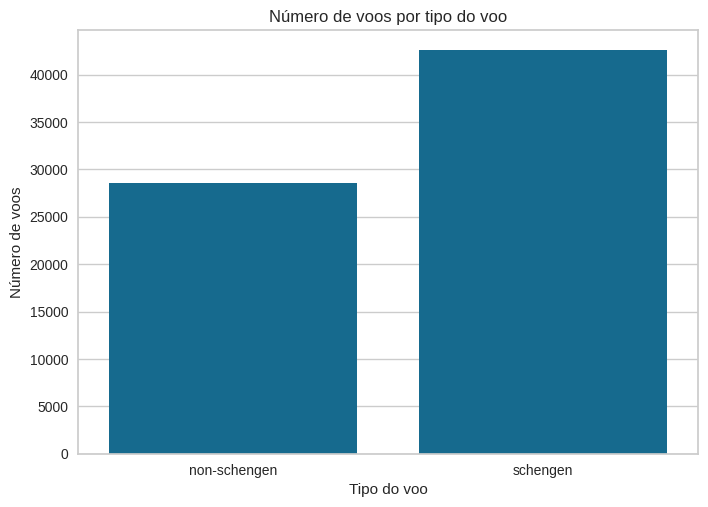

In [23]:
average_delay = dados.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=average_delay)
plt.title('Tipo do voo vs atrasos médios')
plt.xlabel('Tipo do voo')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(data=dados, x='schengen')
plt.title('Número de voos por tipo do voo')
plt.xlabel('Tipo do voo')
plt.ylabel('Número de voos')
plt.show()

No primeiro gráfico, percebemos que os voos fora do espaço Schengen tendem a atrasar mais, em média 15 minutos, enquanto os que são do espaço Schengen atrasam em média 10 minutos.

Entretanto, mesmo o tipo do voo sendo non-schengen, eles aparecem em menos quantidade no conjunto de dados, e ainda assim são os que atrasam mais. Enquanto isso, os voos do tipo schengen aparecem em muita quantidade; em compensação, atrasam menos.

## Quinto gráfico

A seguir, vamos analisar se os atrasos em feriados são maiores ou menores do que em dias não feriados. Para isso, criaremos uma nova célula e ajustaremos o código anterior para a coluna is_holiday, alterando títulos e eixos para refletir a análise de feriado versus atraso médio.

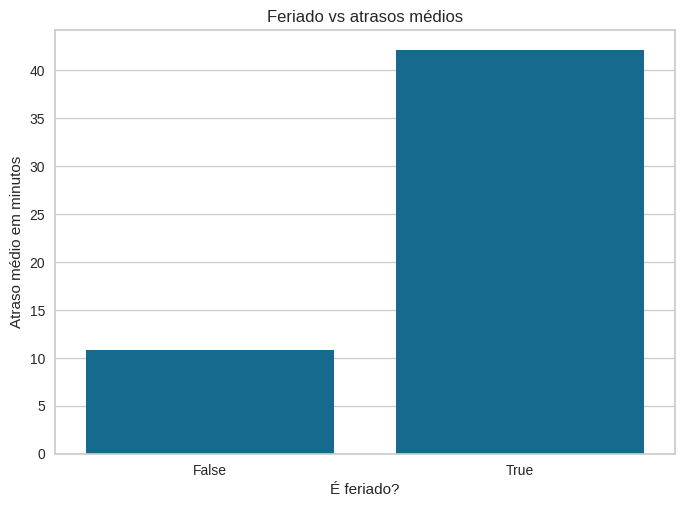

In [24]:
average_delay = dados.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=average_delay)
plt.title('Feriado vs atrasos médios')
plt.xlabel('É feriado?')
plt.ylabel('Atraso médio em minutos')
plt.show()

## Sexto gráfico

Outra análise que podemos é sobre o tipo de aeronave. Pegamos o segundo gráfico que construímos, um countplot(), e adicionamos em uma nova célula. Queremos saber a contagem de amostras por tipo de aeronave. Alteramos o eixo x para aircraft_type e ajustamos os títulos e eixos. Para organizar o gráfico, adicionamos uma ordenação decrescente e rotacionamos os nomes das aeronaves em 70 graus com plt.xticks(rotation=70).

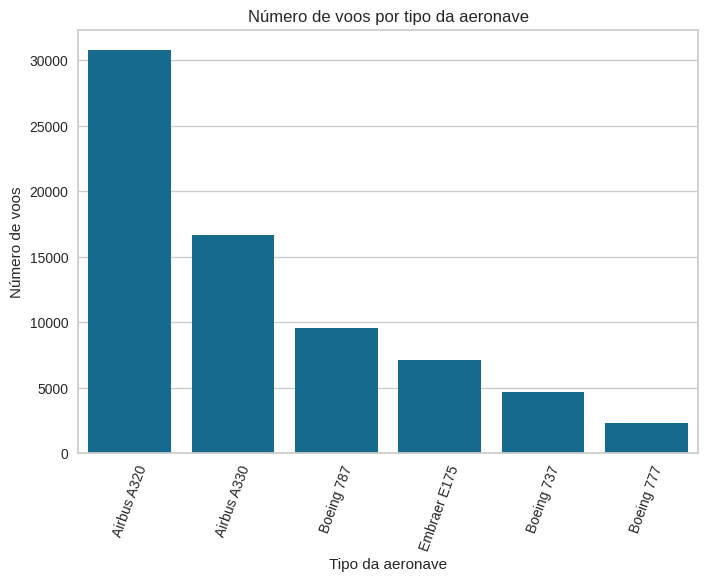

In [25]:
order = dados['aircraft_type'].value_counts().index
sns.countplot(data=dados, x='aircraft_type', order = order)
plt.title('Número de voos por tipo da aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo da aeronave')
plt.ylabel('Número de voos')
plt.show()

## Para saber mais: o Espaço Schengen

O Espaço Schengen é uma área geográfica que engloba a maioria dos países europeus, onde os controles de fronteira foram eliminados para permitir a livre circulação de pessoas entre os países membros. Essa área é denominada em referência ao Acordo de Schengen, assinado em 1985 na vila de Schengen, em Luxemburgo, e implementado em 1995.

O acordo foi nomeado após o local da assinatura, mas o tratado Schengen em si foi um desenvolvimento do Acordo de Schengen de 1990.

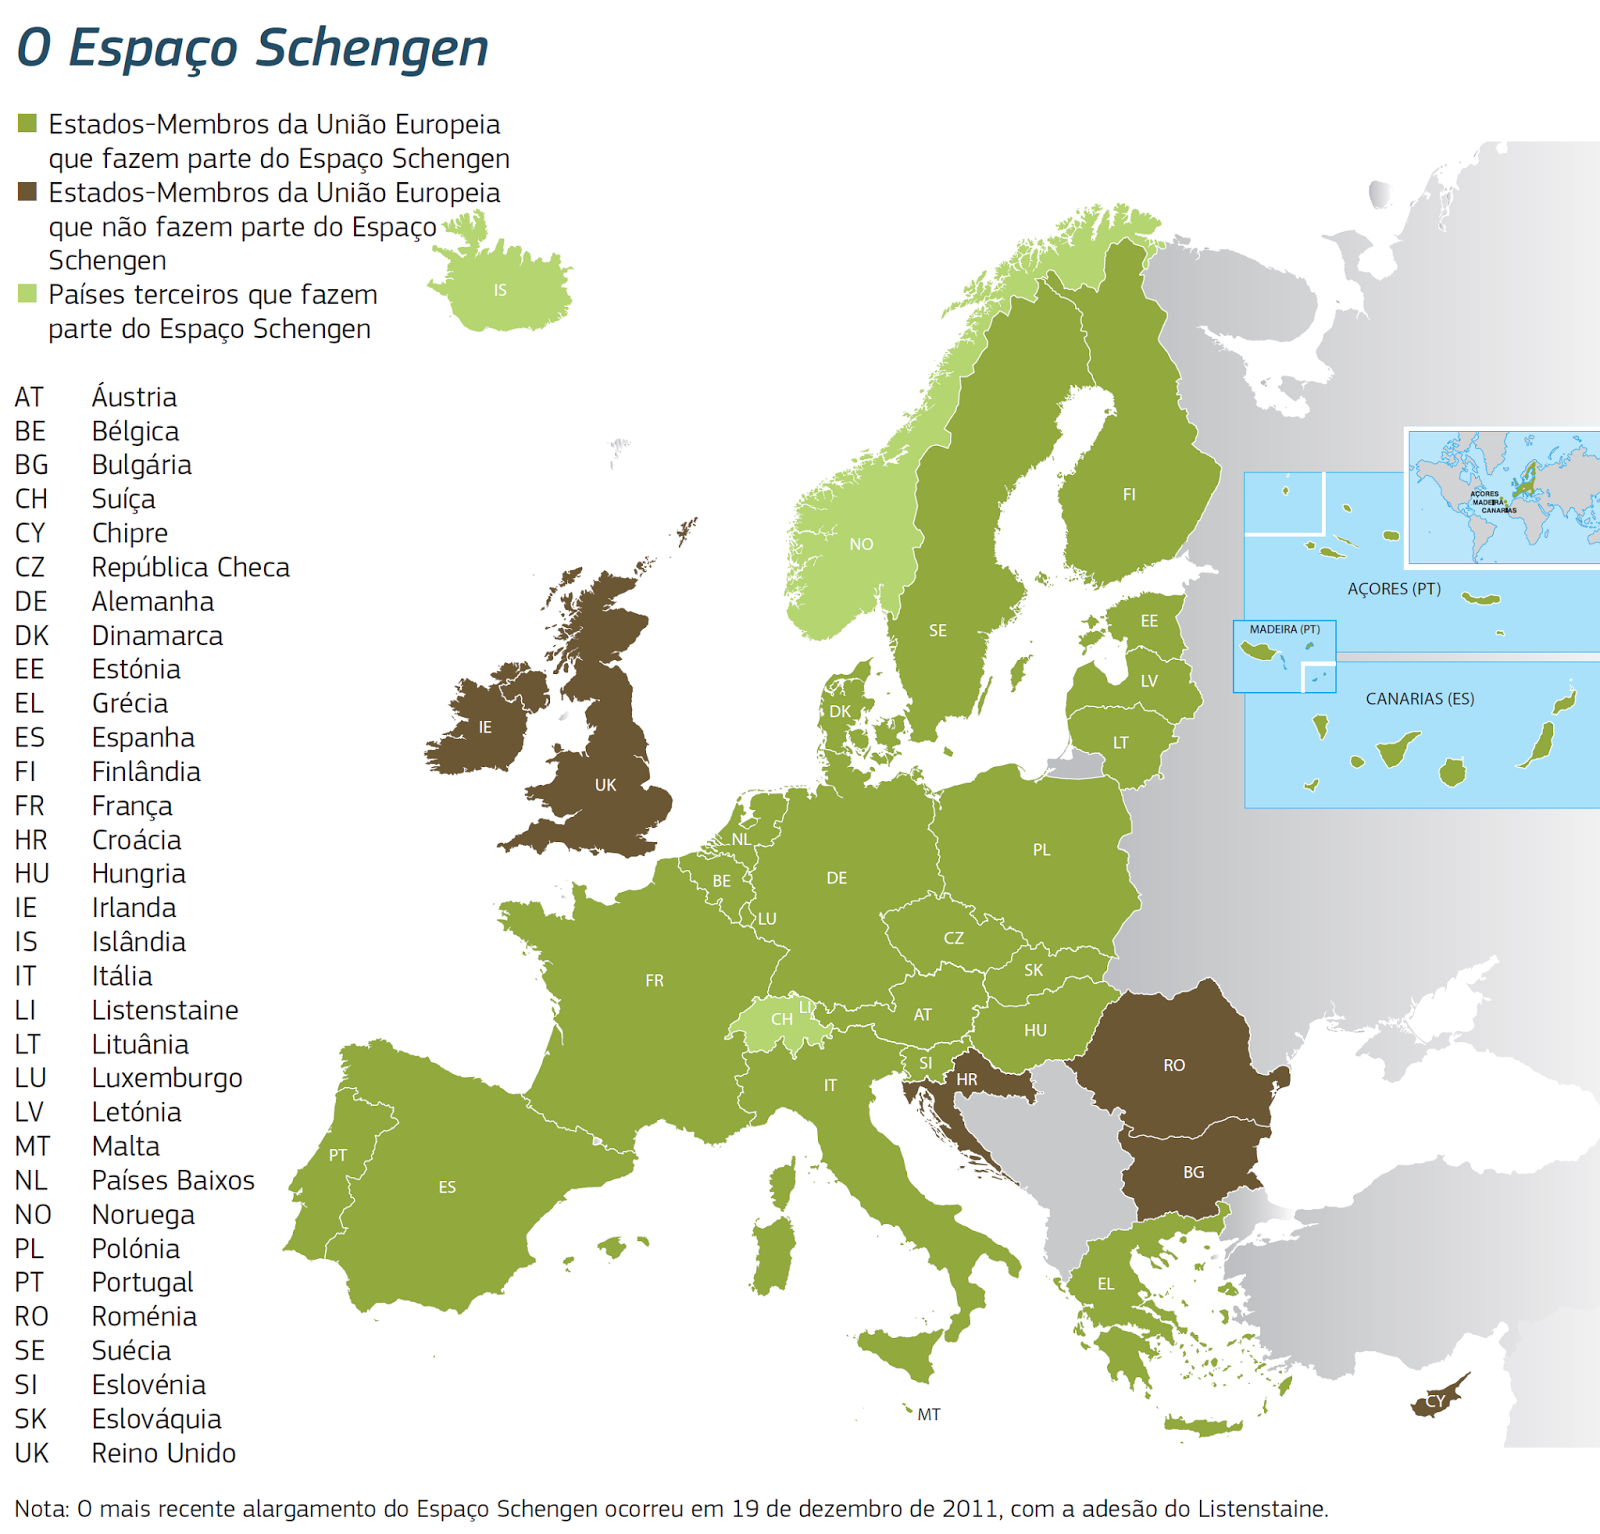

Fonte: [Mapa da Espaço Shengen em 2017](https://)

Os países que fazem parte do Espaço Schengen aboliram os controles de fronteira nas fronteiras internas, o que significa que não é necessário apresentar um passaporte ou passar por verificações de imigração ao viajar entre esses países. Já nas fronteiras externas é mais rigoroso e comum, para garantir a segurança e o controle da imigração.

Atualmente, a maioria dos países da União Europeia (UE) faz parte do Espaço Schengen, juntamente com Noruega, Islândia, Suíça e Liechtenstein que não são membros da UE. No entanto, é importante notar que nem todos os países da UE aderiram ao Acordo de Schengen.

A livre circulação dentro do Espaço Schengen facilita as viagens e o comércio entre os países membros, tornando-o uma parte fundamental da integração europeia e um exemplo de cooperação transfronteiriça em questões de segurança e imigração.



Realizamos a análise gráfica das nossas variáveis do conjunto de dados. Chegou a hora de construir outras visualizações para identificarmos os padrões em outras variáveis, incluindo a variável target, isto é, a variável delay.

Como identificar padrões das variáveis de forma mais abrangente?

Analisando a distribuição dos dados
Para isso, começaremos no Google Colab. Vamos utilizar novamente o notebook para construir essas visualizações. Deixamos uma célula de markdown novamente para organizar o notebook, intitulada "Analisando a distribuição dos dados", exatamente o que vamos fazer neste vídeo.

Deixamos também uma célula de código pronta para digitarmos. Já temos nossas bibliotecas importadas, principalmente a Matplotlib e a Seaborn, então não precisamos mais importar. O que precisamos fazer é utilizá-las.

## Criando histogramas

Para construir uma visualização interessante para analisar a distribuição de uma variável, precisamos utilizar um gráfico que chamamos de histograma. O histograma serve justamente para isso. O Seaborn já tem um método que implementa esse histograma de forma bem fácil para nós. Como utilizamos ele? Digitamos sns.histplot().

Precisamos passar alguns parâmetros, como, por exemplo, data. O conjunto de dados que estamos trabalhando é o dados. A variável que vai estar no eixo x, que é justamente a variável que queremos analisar a distribuição, será a arrival_time.

### Analisando a distribuição dos dados

<Axes: xlabel='arrival_time', ylabel='Count'>

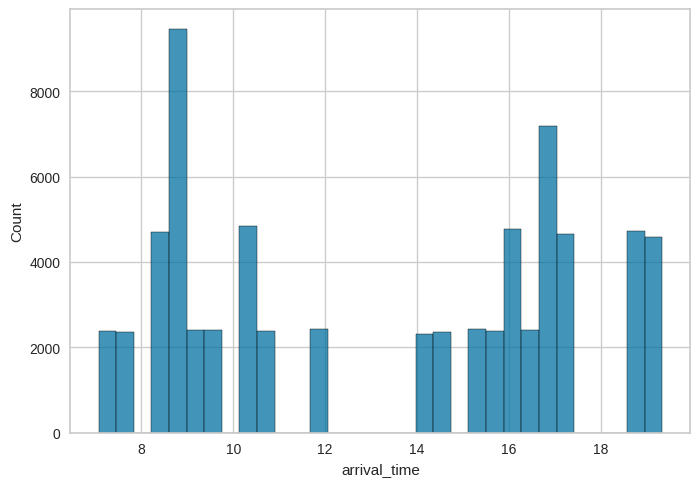

In [26]:
sns.histplot(data=dados, x='arrival_time')

Foi construído um gráfico onde são exibidas algumas barras, que chamamos de bins. Esses bins são intervalos que dividem o nosso conjunto de dados, isto é, a variável arrival_time, em partes iguais. Porém, não sabemos exatamente quantas barras existem no gráfico, e se isso pode ou não afetar a nossa análise.

Antes, vamos colocar outro parâmetro no método histplot(), chamado kde. Basicamente, será uma curva que vai resumir a distribuição dos dados.

<Axes: xlabel='arrival_time', ylabel='Count'>

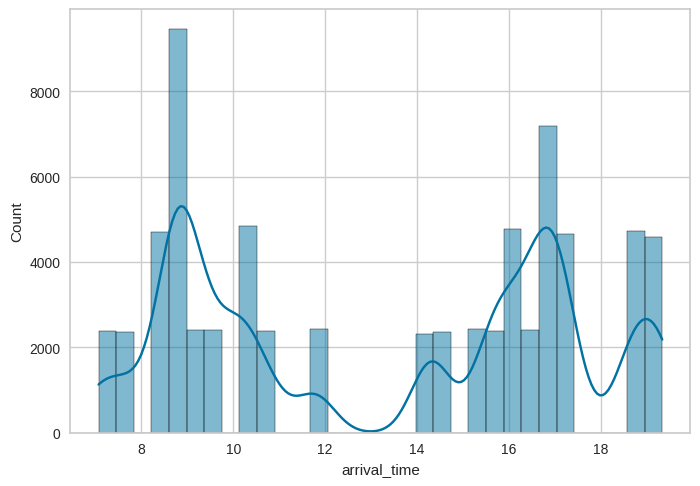

In [27]:
sns.histplot(data=dados, x='arrival_time', kde=True)

Notamos o seguinte: no horário de chegada, há um certo pico por volta das 9 horas da manhã e depois decai por volta do almoço. Quando estamos por volta das 16, 17 horas, novamente, sobe um pouco. Então, são esses os horários em que há mais voos chegando no aeroporto: por volta das 9 e por volta das 17, com o pico subindo e descendo.

    Não notamos nenhuma distribuição assimétrica, nem à direita, nem à esquerda.

Há outro parâmetro que podemos mudar: o bins. Por exemplo, se colocarmos bins=10, como fica a distribuição?

<Axes: xlabel='arrival_time', ylabel='Count'>

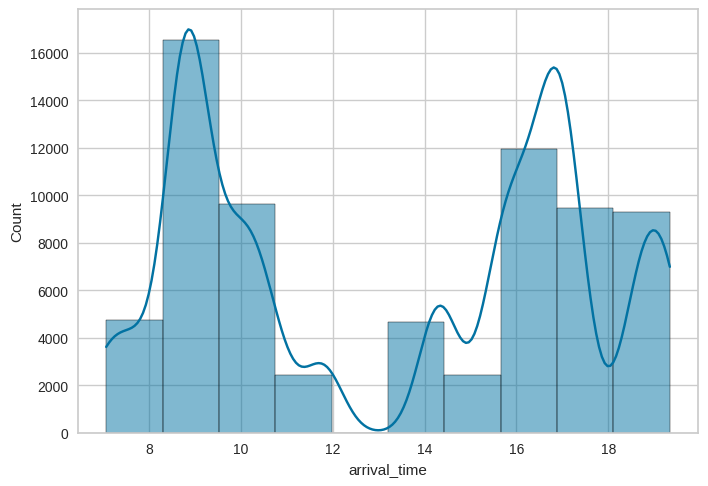

In [28]:
sns.histplot(data=dados, x='arrival_time', kde=True, bins=10)

Percebemos que já mudou o nosso gráfico. Ele ficou levemente diferente. Se colocarmos bins=100, por exemplo, não conseguimos extrair muita informação do gráfico gerado. Será que não há uma forma de encontrarmos uma largura de bin ideal, de forma que fique mais correto? A resposta é sim!

Aplicando a Regra de Freedman-Diaconis
Existe uma regra chamada Regra de Freedman-Diaconis, que fala justamente disso. Ela pode ser utilizada para selecionar a largura dos comprimentos a serem usados em um histograma, conforme indicado na página da Wikipedia.

Vamos utilizar essa regra. Mas como ela é aplicada? Ela determina a largura do bin, que é igual a 2 vezes o intervalo interquartil dividido pela raiz cúbica do número de observações. Vamos implementar essa regra na prática.



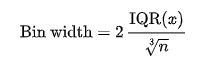

Para isso, criaremos uma célula acima da célula de histograma que estamos desenvolvendo. Já deixamos o código pré-pronto, seguindo o mesmo padrão. Recomendamos que você pause o vídeo, copie para o seu notebook, e volte para a explicação.

In [29]:
import numpy as np

def calcular_largura_bin(df, coluna):
    Q75, Q25 = np.percentile(df[coluna], [75 ,25])
    IQR = Q75 - Q25
    largura_bin = 2 * IQR * np.power(len(df[coluna]), -1/3)
    return largura_bin

Na primeira linha, colocamos import numpy as np, importando a biblioteca NumPy e dando o apelido de np. Em seguida, definimos a função calcular_largura_bin(). Passamos para ela dois parâmetros: o DataFrame (df) e a coluna que queremos calcular a largura do bin. Na próxima linha, colocamos Q75 e Q25, referenciando o primeiro e o terceiro quartil, e utilizamos np.percentile(df[coluna], [75, 25]), que são os quartis que queremos, o terceiro e o primeiro.

Depois, calculamos o intervalo interquartil existente na fórmula que acabamos de mostrar. Basta subtrair o terceiro do primeiro. O intervalo interquartil é Q3 menos Q1.

A próxima coisa que precisamos fazer é justamente calcular a largura do bin. Para isso, basta aplicar diretamente a fórmula com largura_bin = 2 * IQR * np.power(len(df[coluna]), -1/3).

Isso seria basicamente multiplicar o intervalo interquartil por 2, multiplicar pelo número de observações, que é o n, elevado a -1/3, o que é a mesma coisa que multiplicar o n elevado a 1/3 elevado a -1. Qualquer número elevado a -1 é o inverso desse número. Por exemplo: se fizermos 2 elevado a -1, temos o mesmo que 1 sobre 2. Como o número de observações está no denominador, precisamos elevá-lo a um expoente negativo.

Por fim, retornamos a largura do bin com return largura_bin.

Vamos aplicar agora e pegar a largura do bin na célula abaixo. Porém, há um detalhe: não temos largura do bin.. Felizmente, no Seaborn, há um parâmetro de largura de bin, o binwidth, que será igual ao que vamos calcular agora.

In [30]:
sns.histplot(data=dados, x='arrival_time', kde=True, binwidth=)

Vamos executar a célula anterior para definir a função. Em seguida, iremos copiar o nome da função calcular_largura_bin() e colar na primeira linha célula abaixo. O df que passaremos será dados, enquanto a coluna será arrival_time.

Feito isso, vamos atribuir a função a uma variável que chamaremos de largura_bin_at, de arrival_time. Agora podemos passar essa variável para o parâmetro binwidth.

<Axes: xlabel='arrival_time', ylabel='Count'>

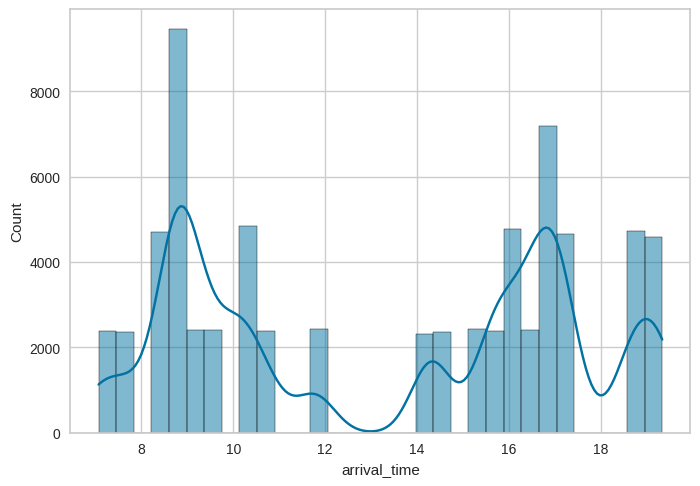

In [31]:
largura_bin_at = calcular_largura_bin(dados, 'arrival_time')

sns.histplot(data=dados, x='arrival_time', kde=True, binwidth=largura_bin_at)

O histograma foi modificado e melhorado. Se quisermos visualizar com a largura, podemos criar uma nova célula, digitar largura_bin_at e visualizar que a largura dos bins é 0.38.

In [32]:
largura_bin_at

np.float64(0.3846176245547029)

## Criando o histograma de departure_time

Fizemos o histograma para a variável arrival_time, ou seja, o horário de chegada. Agora vamos construir para departure_time, o horário de saída que calculamos. Vamos conferir se existe algum padrão nisso.

Vamos copiar e colar o código da célula anterior em uma nova célula, mas em vez de arrival_time, colocaremos departure_time e executaremos com "Shift + Enter".

<Axes: xlabel='departure_time', ylabel='Count'>

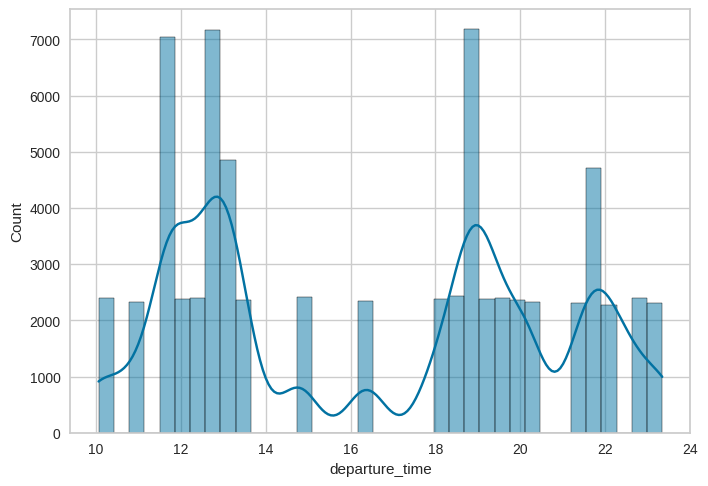

In [33]:
largura_bin_dt = calcular_largura_bin(dados, 'departure_time')

sns.histplot(data=dados, x='departure_time', kde=True, binwidth=largura_bin_dt)

Percebemos que a relação permanece. Notamos que por volta do meio-dia há um pico, onde tem mais voos, depois tem um decaimento, e logo em seguida um pico novamente. Provavelmente, esses voos que saem ao meio-dia são aqueles que chegam às 9 horas, como vimos anteriormente. Essa relação também permanece para 18, 19 horas. Por volta de 19 horas, o voo que chega às 17, sai às 19. É de se esperar isso também.

## Criando o histograma de delay

Construímos o histograma com duas variáveis, e percebemos que não há nenhuma assimetria entre elas, não existe um padrão muito bem definido. Agora vamos construir para a variável target.

Para isso, como é uma quantidade de código considerável, já deixamos pré-pronto os comandos. Novamente, dê uma pausa, copie esse código para o seu notebook e volte para continuarmos a explicação.

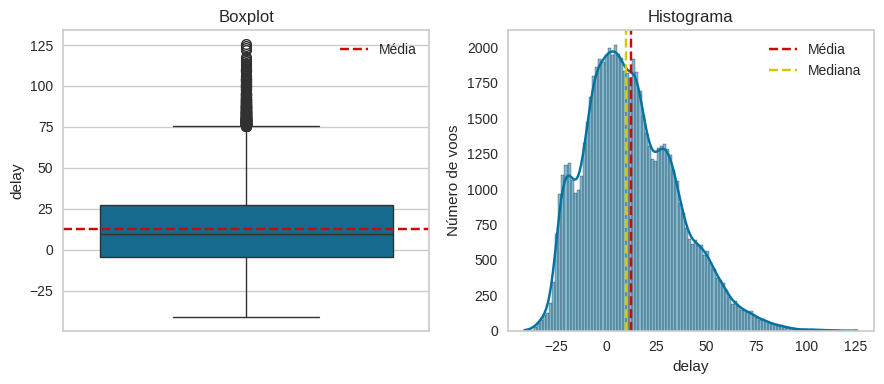

In [34]:
mean_delay = dados['delay'].mean()
median_delay = dados['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=dados, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média')
axes[0].legend()

largura_bin_delay = calcular_largura_bin(dados, 'delay')
sns.histplot(data=dados, x='delay', ax=axes[1], kde=True, binwidth=largura_bin_delay)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

Nas duas primeiras linhas, calculamos a média e a mediana do delay (mean_delay e median_delay), que é a variável target, e depois atribuímos subplots(). subplots() são vários gráficos em um. Atribuímos a duas variáveis: a fig e axes. axes são exatamente os subplots().

Em seguida, construímos o primeiro boxplot(). Para isso, digitamos sns.boxplot(), atribuímos data a dados, que é um DataFrame, o y será o delay, e ax será axes[0], aonde o gráfico estará. Além disso, atribuímos o título "Boxplot".

Depois, colocamos uma linha horizontal com a média na cor vermelha, no caso color='r' significa red (vermelho). O estilo da linha (linestyle) é tracejado (--), e o label é "Média". Além disso, imprimimos a legenda.

O outro gráfico que construímos é um histplot(). Consiste na mesma coisa que construímos anteriormente, em que data é igual a dados, x é delay, será o segundo gráfico, por isso axes[1], e o kde é igual a True. Aprendemos como ter a largura dos bins correta. Então, copiamos o código de largura_bin_at da célula acima e fizemos as alterações necessárias.

Também passamos o parâmetro binwidth igual a largura_bin_delay. No ylabel(), temos o número de voos. Colocamos plt.grid(False) na linha abaixo, porque não queremos as grades, pois elas poluem visualmente o gráfico, e colocamos um título para o gráfico de "Histograma".

Depois colocamos duas linhas verticais: uma com a média, na cor vermelha, novamente com o estilo tracejado e com o label "Média"; e outra com a mediana, na cor amarela, novamente tracejada com o label "Mediana". Além disso, imprimimos a legenda do gráfico e colocamos plt.tight_layout() para os gráficos subplots() não ficarem sobrepostos, para as informações não ficarem juntas. Por fim, usamos o método plt.show() para imprimir.

Vamos executar com "Ctrl + Enter". O que temos no nosso boxplot?

Percebemos que é um bonito boxplot. Apesar de ter alguns pontos acima do limite superior, eles não causam deformação no boxplot. São candidatos a outliers, mas provavelmente são alguns casos pontuais do nosso conjunto de dados, com a média por volta dos 15, aproximadamente. Temos o Q1, o primeiro quartil; a mediana um pouco acima do zero; o terceiro quartil; e a média com a linha vermelha, conforme definimos.

Analisando a distribuição da variável target, imprimimos a média e a mediana, mas percebemos que ela é levemente assimétrica à direita, mas essa assimetria não prejudica a qualidade dos dados. É de se esperar essa assimetria, que a distribuição fosse feita dessa forma, mas ela está, de certa forma, próxima do normal, não está tão assimétrica à direita.

Percebemos, inclusive, que a média está bem próxima da mediana, o que é um bom sinal, indica que é uma boa variável para utilizarmos em nosso conjunto de dados. Então, essa relação permanece, a relação de assimetria à direita, onde a média é maior que a mediana, que é maior do que a moda, mas esses valores estão, de certa forma, bem próximos.

## Conclusão

Portanto, não há nenhum tratamento que precisamos fazer na variável target. Chegou a hora de, a partir dessas análises, fazer o tratamento para inserir esses dados em um modelo de machine learning, deixá-los preparados para inserir em um modelo e ele conseguir entender esses dados de forma apropriada.





Ao final, conseguimos construir gráficos descritivos das nossas informações e extrair informações relevantes do nosso conjunto de dados. Resta visualizar a distribuição das variáveis, incluindo a variável alvo, para analisarmos como essa variável se comporta!

In [35]:
import numpy as np

def calcular_largura_bin(df, coluna):
    Q75, Q25 = np.percentile(df[coluna], [75 ,25])
    IQR = Q75 - Q25
    largura_bin = 2 * IQR * np.power(len(df[coluna]), -1/3)
    return largura_bin

<Axes: xlabel='arrival_time', ylabel='Count'>

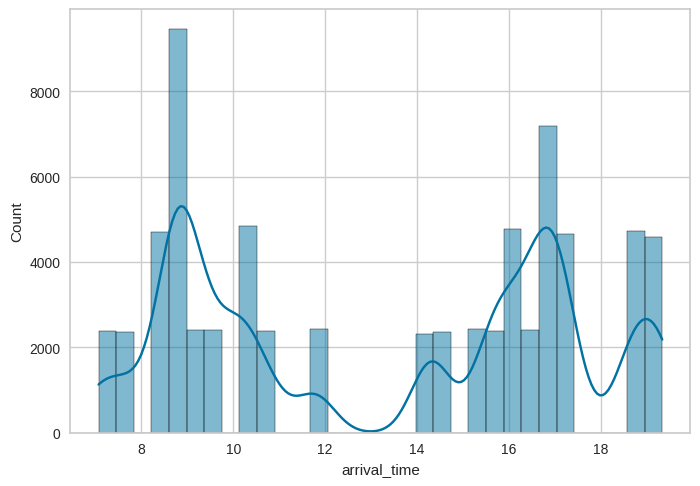

In [36]:
largura_bin_at = calcular_largura_bin(dados, 'arrival_time')

sns.histplot(data=dados, x='arrival_time', kde=True, binwidth=largura_bin_at)

<Axes: xlabel='departure_time', ylabel='Count'>

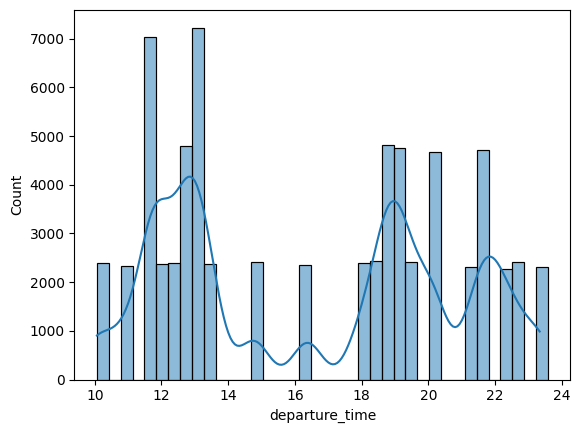

In [ ]:
largura_bin_dt = calcular_largura_bin(dados, 'departure_time')

sns.histplot(data=dados, x='departure_time', kde=True, binwidth=largura_bin_dt)

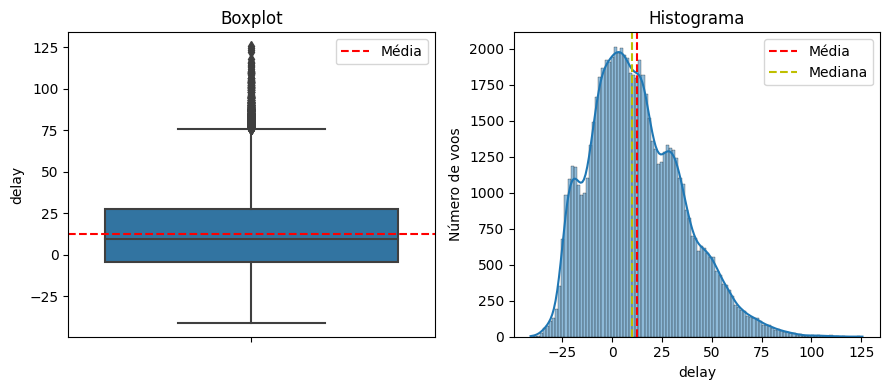

In [ ]:
mean_delay = dados['delay'].mean()
median_delay = dados['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=dados, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média')
axes[0].legend()

largura_bin_delay = calcular_largura_bin(dados, 'delay')
sns.histplot(data=dados, x='delay', ax=axes[1], kde=True, binwidth=largura_bin_delay)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

## Objetivo do boxplot

O boxplot, também conhecido como diagrama de caixa, é uma representação gráfica que nos permite visualizar a distribuição dos dados de uma forma mais clara e objetiva. Ele é composto por: um retângulo que representa a mediana e os quartis dos dados, além de linhas que se estendem para fora do retângulo, que mostram a amplitude dos dados, conforme a imagem abaixo:

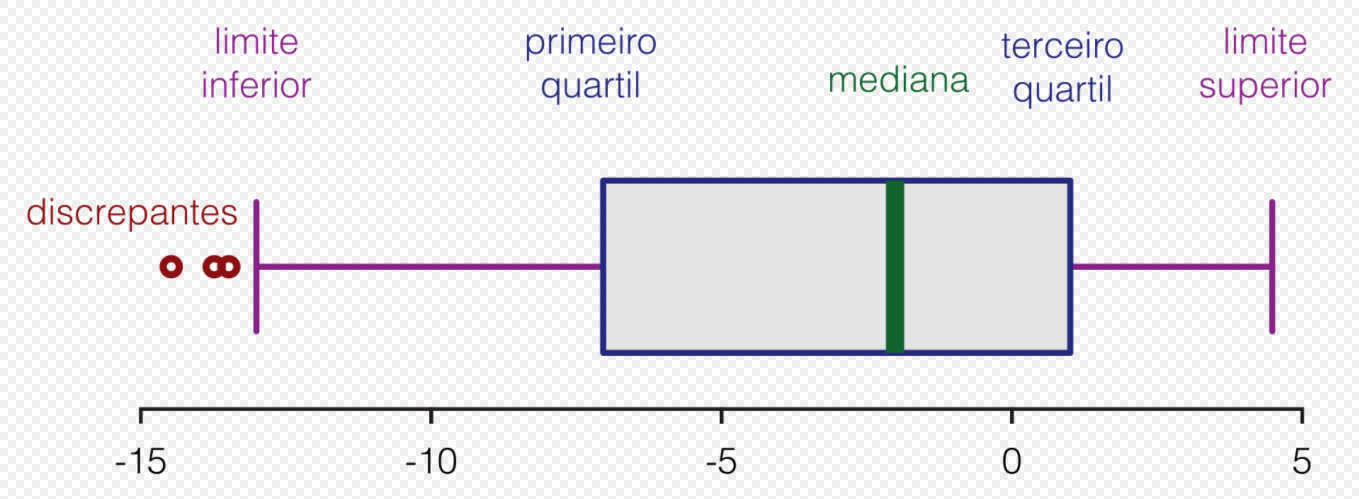

Onde:

- O limite inferior é o valor mínimo que um dado pode ter sem ser considerado um valor atípico (outlier). Ele é calculado como Q1 - 1,5 x IQR (onde IQR é a amplitude interquartil, ou seja, a diferença entre o terceiro quartil e o primeiro quartil).

- O primeiro quartil (Q1) é o valor que divide os dados em 25% abaixo e 75% acima dele. Ou seja, 25% dos dados estão abaixo do Q1 e 75% estão acima.

- A mediana é o valor que divide os dados em 50% abaixo e 50% acima dele.
O terceiro quartil (Q3) é o valor que divide os dados em 75% abaixo e 25% acima dele. Ou seja, 75% dos dados estão abaixo do Q3 e 25% estão acima.

- O limite superior é o valor máximo que um dado pode ter sem ser considerado um valor atípico. Ele é calculado como Q3 + 1,5 x IQR.

- Diante disso, podemos dizer que finalidade do boxplot é:


Visualizar a distribuição dos dados e identificar possíveis candidatos a outliers.


O boxplot é usado para visualizar a distribuição dos dados e identificar possíveis outliers. Ele mostra os quartis (Q1, Q2 e Q3), a mediana (Q2), além de indicar a presença de valores extremos ou discrepantes

## Faça como eu fiz

Nesta aula, realizamos a análise exploratória dos dados construindo gráficos e analisando as estatísticas descritivas do conjunto de dados referente aos atrasos de voos.

Então, chegou o momento de você realizar o passo a passo executado durante a aula.

Caso tenha dúvidas, confira o andamento do seu projeto ao clicar na opção Opinião da pessoa instrutora na sequência.

Opinião do instrutor

1 - O primeiro passo é fazer a leitura do arquivo CSV utilizando o Pandas:

In [37]:
import pandas as pd
dados = pd.read_csv('flights.csv')

2 - Imprima as estatísticas descritivas utilizando os métodos describe e info.

In [38]:
dados.describe()  # Estatística descritivas para as variáveis numéricas

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [39]:
dados.describe(include='O')  # Estatística descritivas para as variáveis do tipo “object”

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [40]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


3 - Construa as visualizações gráficas:

In [41]:
# Importando as bibliotecas necessárias

import matplotlib.pyplot as plt
import seaborn as sns

Em seguida, vamos construir dois gráficos: um de "Companhias aéreas vs Atrasos médios", para ser possível identificar qual companhia aérea possui maior atraso médio; e outro de "Número de voos por companhia aérea".

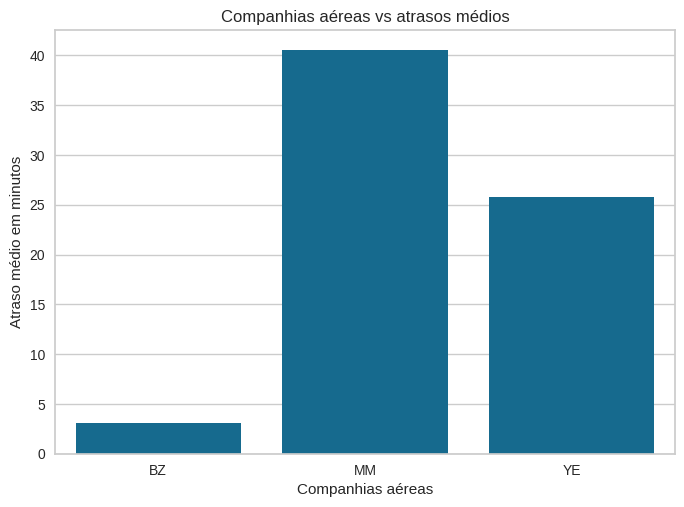

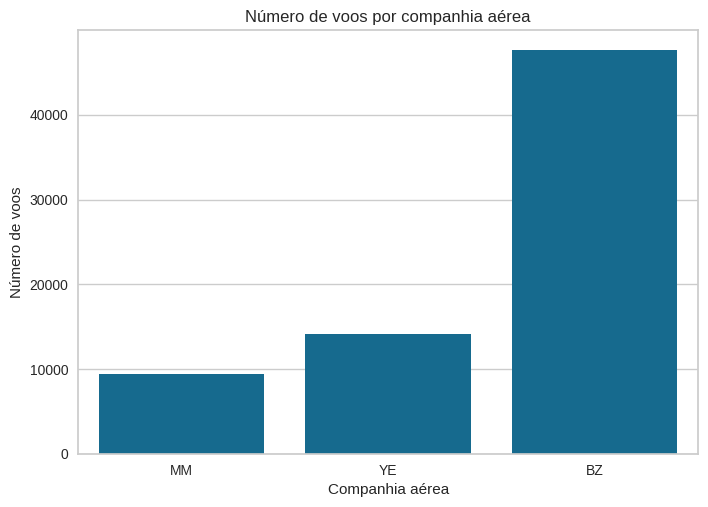

In [42]:
average_delay = dados.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=average_delay)
plt.title('Companhias aéreas vs atrasos médios')
plt.xlabel('Companhias aéreas')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(data=dados, x='airline')
plt.title('Número de voos por companhia aérea')
plt.xlabel('Companhia aérea')
plt.ylabel('Número de voos')
plt.show()

Os próximos gráficos a serem construídos são: Tipo do voo vs Atrasos médios e Número de voos por tipo do voo

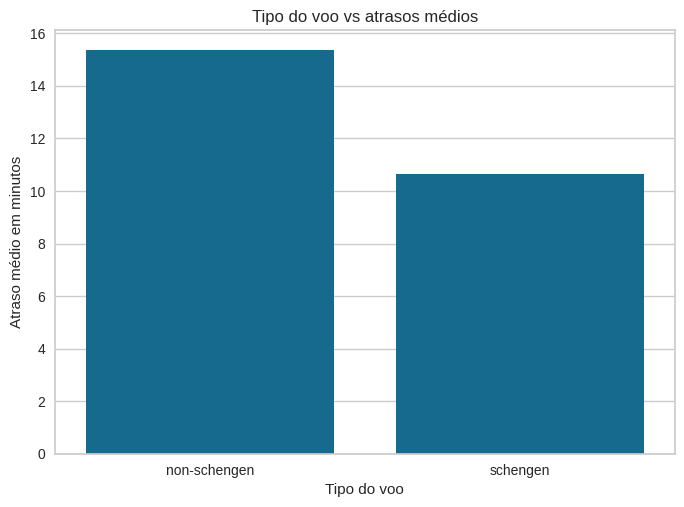

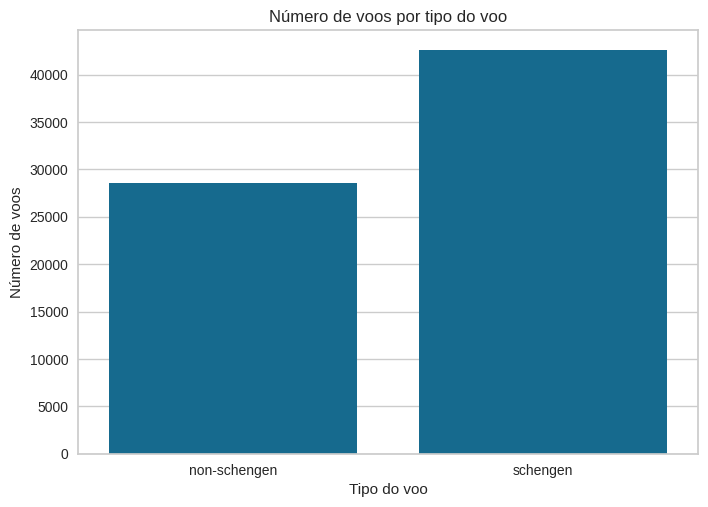

In [43]:
average_delay = dados.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=average_delay)
plt.title('Tipo do voo vs atrasos médios')
plt.xlabel('Tipo do voo')
plt.ylabel('Atraso médio em minutos')
plt.show()

sns.countplot(data=dados, x='schengen')
plt.title('Número de voos por tipo do voo')
plt.xlabel('Tipo do voo')
plt.ylabel('Número de voos')
plt.show()

Vamos construir também um gráfico para analisar se há mais atrasos em feriados:

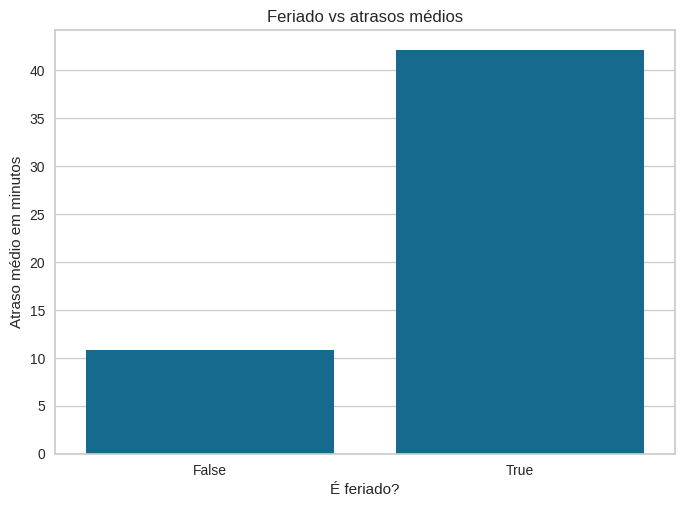

In [44]:
average_delay = dados.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=average_delay)
plt.title('Feriado vs atrasos médios')
plt.xlabel('É feriado?')
plt.ylabel('Atraso médio em minutos')
plt.show()

O próximo gráfico é o de Número de voos por tipo da aeronave:

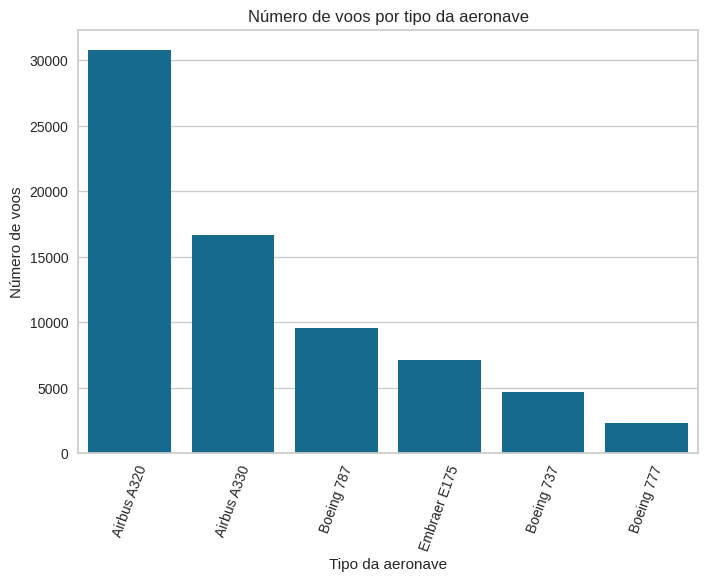

In [45]:
order = dados['aircraft_type'].value_counts().index
sns.countplot(data=dados, x='aircraft_type', order = order)
plt.title('Número de voos por tipo da aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo da aeronave')
plt.ylabel('Número de voos')
plt.show()

4 - Analise a distribuição dos dados.

É importante analisar a distribuição dos dados antes de inserir em um modelo de regressão para garantir que o modelo seja apropriado para os dados. A distribuição deles pode afetar a precisão do modelo, por isso, é importante garantir que os dados estejam distribuídos de maneira adequada antes de realizar a análise. Além disso, a análise da distribuição dos dados pode ajudar a identificar valores discrepantes e decidir como lidar com eles antes de realizar a análise.

O primeiro passo é definir uma largura para os bins. Bins, em um histograma, são intervalos de valores que são usados para agrupar os dados em classes. Para definir essa largura vamos utilizar a Regra Freedman-Diaconis que matematicamente é definida como:



In [46]:
import numpy as np

def calcular_largura_bin(df, coluna):
    Q75, Q25 = np.percentile(df[coluna], [75 ,25])
    IQR = Q75 - Q25
    largura_bin = 2 * IQR * np.power(len(df[coluna]), -1/3)
    return largura_bin

Agora vamos construir os histogramas para o horário de chegada e o horário de partida dos aviões

<Axes: xlabel='arrival_time', ylabel='Count'>

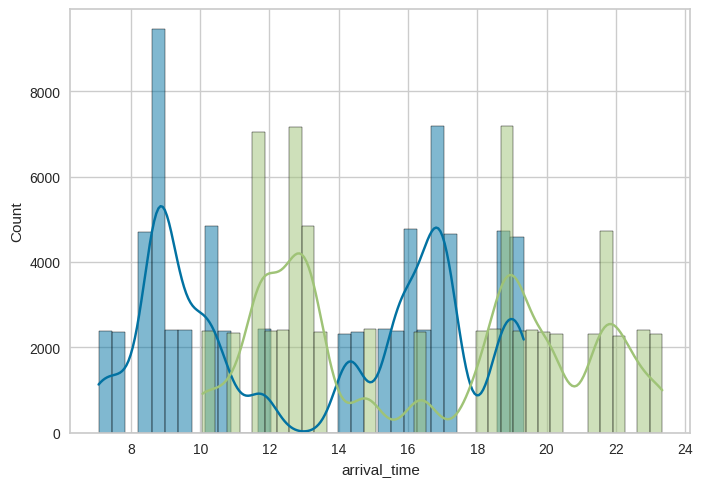

In [47]:
largura_bin_at = calcular_largura_bin(dados, 'arrival_time')
largura_bin_dt = calcular_largura_bin(dados, 'departure_time')
sns.histplot(data=dados, x='arrival_time', kde=True, binwidth=largura_bin_at)
sns.histplot(data=dados, x='departure_time', kde=True, binwidth=largura_bin_dt)

E por último vamos construir um boxplot e um histograma da variável target (delay).

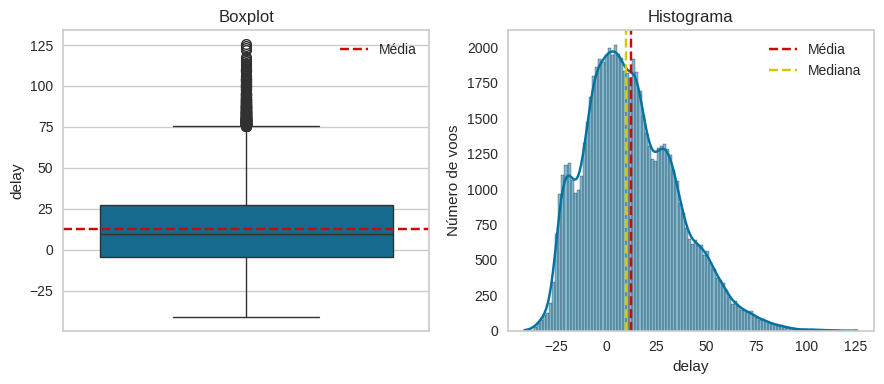

In [48]:
mean_delay = dados['delay'].mean()
median_delay = dados['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=dados, y='delay', ax=axes[0])
axes[0].set_title('Boxplot')

axes[0].axhline(y=mean_delay, color='r', linestyle='--', label='Média')
axes[0].legend()

largura_bin_delay = calcular_largura_bin(dados, 'delay')
sns.histplot(data=dados, x='delay', ax=axes[1], kde=True, binwidth=largura_bin_delay)
plt.ylabel('Número de voos')
plt.grid(False)
axes[1].set_title('Histograma')

axes[1].axvline(x=mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(x=median_delay, color='y', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

## O que aprendemos?

## Nessa aula, você aprendeu

  - Analisar as estatísticas descritivas dos dados;

  - Obter informações relevantes dos dados como a quantidade de dados nulos e a tipagem das colunas;

  - Construir a análise gráfica dos dados;

  - Construir a visualização gráfica da distribuição dos dados.


# **<font color=green fontsize=6>Aula 02 - Criando novas colunas**

## Feature engineering

In [ ]:
dados['date'] = pd.to_datetime(dados['year'].astype(str) + '-' + (dados['day'] + 1).astype(str), format='%Y-%j')
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01


In [ ]:
dados['is_weekend'] = dados['date'].dt.weekday.isin([5, 6])
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False


In [ ]:
dados['day_name'] = dados['date'].dt.day_name()
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday


### Feature Encoding

In [ ]:
dados.nunique()

flight_id            30
airline               3
aircraft_type         6
schengen              2
origin               10
arrival_time         30
departure_time       30
day                 365
year                 13
is_holiday            2
delay             71175
date               4745
is_weekend            2
day_name              7
dtype: int64

In [ ]:
dados['is_holiday'].unique()

array([False,  True])

In [ ]:
dados['schengen'] = dados['schengen'].replace({'non-schengen': 0, 'schengen': 1})
dados['is_holiday'] = dados['is_holiday'].replace({False: 0, True: 1})
dados['is_weekend'] = dados['is_weekend'].replace({False: 0, True: 1})
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,0,TCY,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,Friday
1,10,YE,Airbus A320,0,TCY,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,Friday
2,3,BZ,Embraer E175,1,TZF,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,Friday
3,28,BZ,Airbus A330,0,EMM,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,Friday
4,15,BZ,Airbus A330,0,FJB,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,Friday


In [ ]:
variaveis_categoricas = ['airline', 'aircraft_type', 'origin', 'day_name']

In [ ]:
df_encoded = pd.get_dummies(data=dados, columns=variaveis_categoricas, dtype=int)
df_encoded.head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


### Limpando os Dados

In [ ]:
df_encoded[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [ ]:
df_clean = df_encoded.drop(['flight_id', 'departure_time', 'day', 'year', 'date'], axis=1)
df_clean.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,0,8.885071,0,70.205981,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,8.939996,0,38.484609,0,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,15.967963,0,19.138491,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,16.571894,0,15.016271,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


## Seleção e validação do modelo

### Treinamento do DummyRegressor

In [ ]:
X = df_clean.drop(['delay'], axis=1)
y = df_clean['delay']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.dummy import DummyRegressor

model_dummy = DummyRegressor()
model_dummy.fit(X_train, y_train)

DummyRegressor()

In [ ]:
y_pred_dummy = model_dummy.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calcular_metricas_regressao(y_test, y_pred):

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    metricas = {
        'Raiz do Erro Quadrático Médio': round(rmse, 4),
        'Erro Absoluto Médio': round(mae, 4),
        'R2 Score': round(r2, 4)
    }

    return metricas


In [ ]:
calcular_metricas_regressao(y_test, y_pred_dummy)

{'Raiz do Erro Quadrático Médio': 23.2241,
 'Erro Absoluto Médio': 18.6127,
 'R2 Score': -0.0}

### Treinamento do RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_rf)

{'Raiz do Erro Quadrático Médio': 13.7301,
 'Erro Absoluto Médio': 11.0138,
 'R2 Score': 0.6505}

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


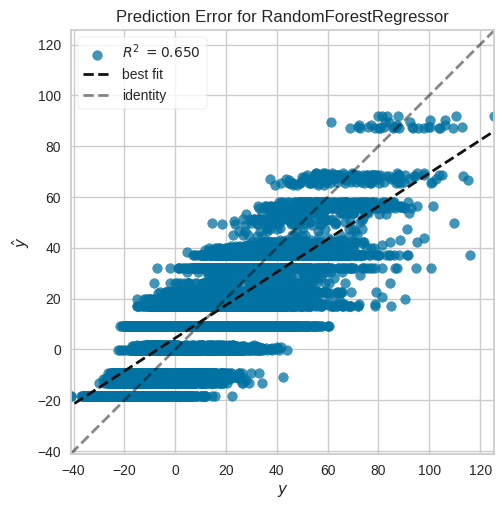

In [ ]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model_rf, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


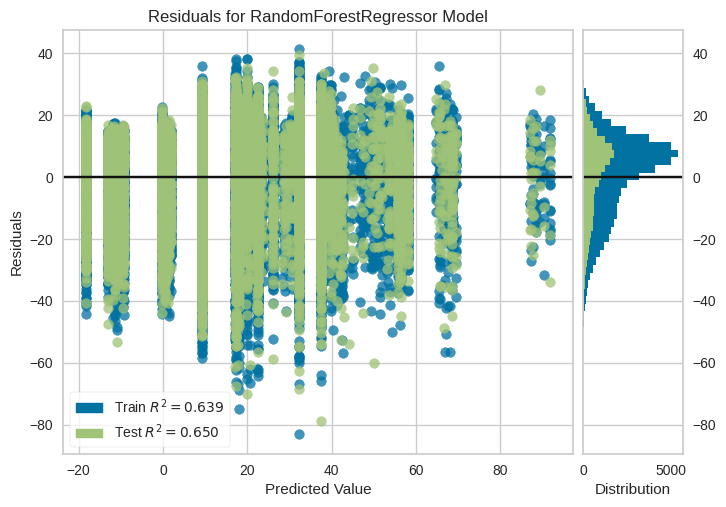

In [ ]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(model_rf, X_train, y_train, X_test, y_test)

### Validação cruzada

In [ ]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(model_rf, X_train, y_train, cv=cv, scoring=scoring)
cv_results

{'fit_time': array([6.78287721, 3.38463116, 3.92843294, 3.16478062, 3.09212136]),
 'score_time': array([0.0588038 , 0.08701086, 0.05747533, 0.06011581, 0.05707955]),
 'test_mae': array([-11.07421449, -11.30328674, -11.05630068, -11.14454886,
        -11.17423931]),
 'test_rmse': array([-13.76668658, -14.04881475, -13.79310018, -13.87672957,
        -13.9303929 ]),
 'test_r2': array([0.64679676, 0.62433581, 0.64536956, 0.64090813, 0.63477298])}

In [ ]:
for metric in scoring.keys():
    scores = cv_results[f'test_{metric}']
    mean_score = "{:.3f}".format(scores.mean())
    std_score = "{:.3f}".format(scores.std())

    print(f"{metric.upper()} Scores: {[f'{val:.3f}' for val in scores]}")
    print(f"{metric.upper()} Média: {mean_score}, Std: {std_score}")
    print('----------------------------------------------------------------')

MAE Scores: ['-11.074', '-11.303', '-11.056', '-11.145', '-11.174']
MAE Média: -11.151, Std: 0.088
----------------------------------------------------------------
RMSE Scores: ['-13.767', '-14.049', '-13.793', '-13.877', '-13.930']
RMSE Média: -13.883, Std: 0.101
----------------------------------------------------------------
R2 Scores: ['0.647', '0.624', '0.645', '0.641', '0.635']
R2 Média: 0.638, Std: 0.008
----------------------------------------------------------------


## Otimização de hiperparâmetros

### Seleção de recursos

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


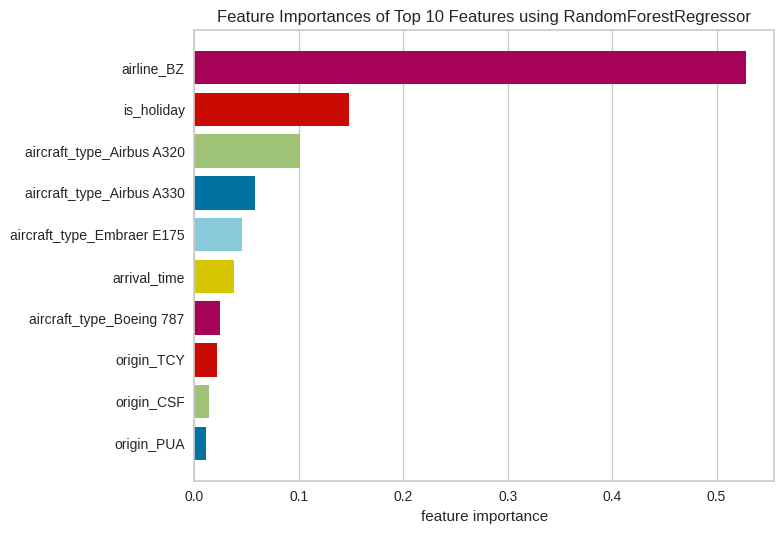

<Axes: title={'center': 'Feature Importances of Top 10 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [ ]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model_rf, relative=False, topn=10)
viz.fit(X_train, y_train)
viz.show()

In [ ]:
importances = model_rf.feature_importances_

feature_importances = pd.DataFrame({'Features': X.columns, 'Importances': importances})
feature_importances.sort_values('Importances', ascending=False)

,Features,Importances
4,airline_BZ,0.528604
2,is_holiday,0.147833
7,aircraft_type_Airbus A320,0.100719
8,aircraft_type_Airbus A330,0.058221
12,aircraft_type_Embraer E175,0.045619
1,arrival_time,0.037614
11,aircraft_type_Boeing 787,0.024663
20,origin_TCY,0.022120
15,origin_CSF,0.013979
19,origin_PUA,0.011385


In [ ]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

for count in [1, 5, 10, 15, 20, 25, 30]:
    selected_features = feature_importances['Features'].values[:count]

    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    model_selected_features.fit(X_train_selected, y_train)

    y_pred = model_selected_features.predict(X_test_selected)

    metricas = calcular_metricas_regressao(y_test, y_pred)

    results_df[count] = list(metricas.values())

results_df

,1,5,10,15,20,25,30
RMSE,23.0970,14.9389,14.3002,13.7406,13.7387,13.7284,13.7301
MAE,18.5637,12.0211,11.4904,11.0253,11.0242,11.0127,11.0138
R2,0.0109,0.5862,0.6208,0.6499,0.6500,0.6506,0.6505


In [ ]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(random_state=42, max_depth=5)

for count in range(10, 16):
    selected_features = feature_importances['Features'].values[:count]

    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    model_selected_features.fit(X_train_selected, y_train)

    y_pred = model_selected_features.predict(X_test_selected)

    metricas = calcular_metricas_regressao(y_test, y_pred)

    results_df[count] = list(metricas.values())

results_df

,10,11,12,13,14,15
RMSE,14.3002,14.3002,14.3939,13.7410,13.7410,13.7406
MAE,11.4904,11.4904,11.4096,11.0256,11.0254,11.0253
R2,0.6208,0.6208,0.6159,0.6499,0.6499,0.6499


In [ ]:
selected_features = feature_importances['Features'].values[:13]

X_select_features = X[selected_features]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_select_features, y, random_state=42)

### Otimizando os hiperparâmetros com o GridSearchCV

In [ ]:
param_grid = {
      'max_depth': [5, 10, 15],
      'min_samples_leaf': [1, 2, 3],
      'min_samples_split': [2, 4, 6],
      'n_estimators': [100, 150, 200]
 }

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=param_grid,
             scoring='r2', cv=cv)

model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [ ]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
y_pred_model_grid = model_grid.predict(X_test)
metricas_model_grid = calcular_metricas_regressao(y_test, y_pred_model_grid)
metricas_model_grid

{'Raiz do Erro Quadrático Médio': 13.2635,
 'Erro Absoluto Médio': 10.6731,
 'R2 Score': 0.6738}

In [ ]:
results_df['model_grid'] = list(metricas_model_grid.values())
results_df

,10,11,12,13,14,15,model_grid
RMSE,14.3002,14.3002,14.3939,13.7410,13.7410,13.7406,13.2635
MAE,11.4904,11.4904,11.4096,11.0256,11.0254,11.0253,10.6731
R2,0.6208,0.6208,0.6159,0.6499,0.6499,0.6499,0.6738


### Salvando o modelo

In [ ]:
  import pickle

In [ ]:
try:
  with open('model_producao.pkl', 'wb') as file:
    pickle.dump(model_grid.best_estimator_, file)
  print('Modelo salvo com sucesso!!!')
except Exception as e:
  print('Ocorreu um erro ao salvar o modelo: ', str(e))

Modelo salvo com sucesso!!!
